<a href="https://colab.research.google.com/github/AtharvaJ-236/Data-Science/blob/main/Decision_Tree_DS_Pract_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Fifa_world_cup_matches.csv to Fifa_world_cup_matches.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/Fifa_world_cup_matches.csv")
print(df.head())

           team1         team2 possession team1 possession team2  \
0          QATAR       ECUADOR              42%              50%   
1        ENGLAND          IRAN              72%              19%   
2        SENEGAL   NETHERLANDS              44%              45%   
3  UNITED STATES         WALES              51%              39%   
4      ARGENTINA  SAUDI ARABIA              64%              24%   

  possession in contest  number of goals team1  number of goals team2  \
0                    8%                      0                      2   
1                    9%                      6                      2   
2                   11%                      0                      2   
3                   10%                      1                      1   
4                   12%                      1                      2   

          date     hour category  ...  penalties scored team1  \
0  20 NOV 2022  17 : 00  Group A  ...                       0   
1  21 NOV 2022  14 : 0

In [3]:
percent_cols = ['possession team1', 'possession team2', 'possession in contest']

for col in percent_cols:
    df[col] = df[col].str.replace('%', '').astype(float)

In [4]:
df['Win'] = (df['number of goals team1'] > df['number of goals team2']).astype(int)

feature_cols = [
    'possession team1','possession team2','possession in contest',
    'number of goals team1','number of goals team2',
    'total attempts team1','total attempts team2',
    'on target attempts team1','on target attempts team2',
    'off target attempts team1','off target attempts team2',
    'passes team1','passes team2',
    'passes completed team1','passes completed team2',
    'corners team1','corners team2',
    'free kicks team1','free kicks team2',
    'forced turnovers team1','forced turnovers team2'
]

X = df[feature_cols]
y = df["Win"]

print(df.isnull().sum())
X = X.fillna(X.median()) # Fill missing values with null


team1                                0
team2                                0
possession team1                     0
possession team2                     0
possession in contest                0
                                    ..
forced turnovers team1               0
forced turnovers team2               0
defensive pressures applied team1    0
defensive pressures applied team2    0
Win                                  0
Length: 89, dtype: int64


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101
) #Train - test split

In [6]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(
    random_state=0,
    criterion='gini'
)

clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [7]:
from sklearn.metrics import accuracy_score

pred_test = clf.predict(X_test)
pred_train = clf.predict(X_train)

print("Test Accuracy: ", accuracy_score(y_test, pred_test))
print("Train Accuracy:", accuracy_score(y_train, pred_train))

Test Accuracy:  0.85
Train Accuracy: 1.0


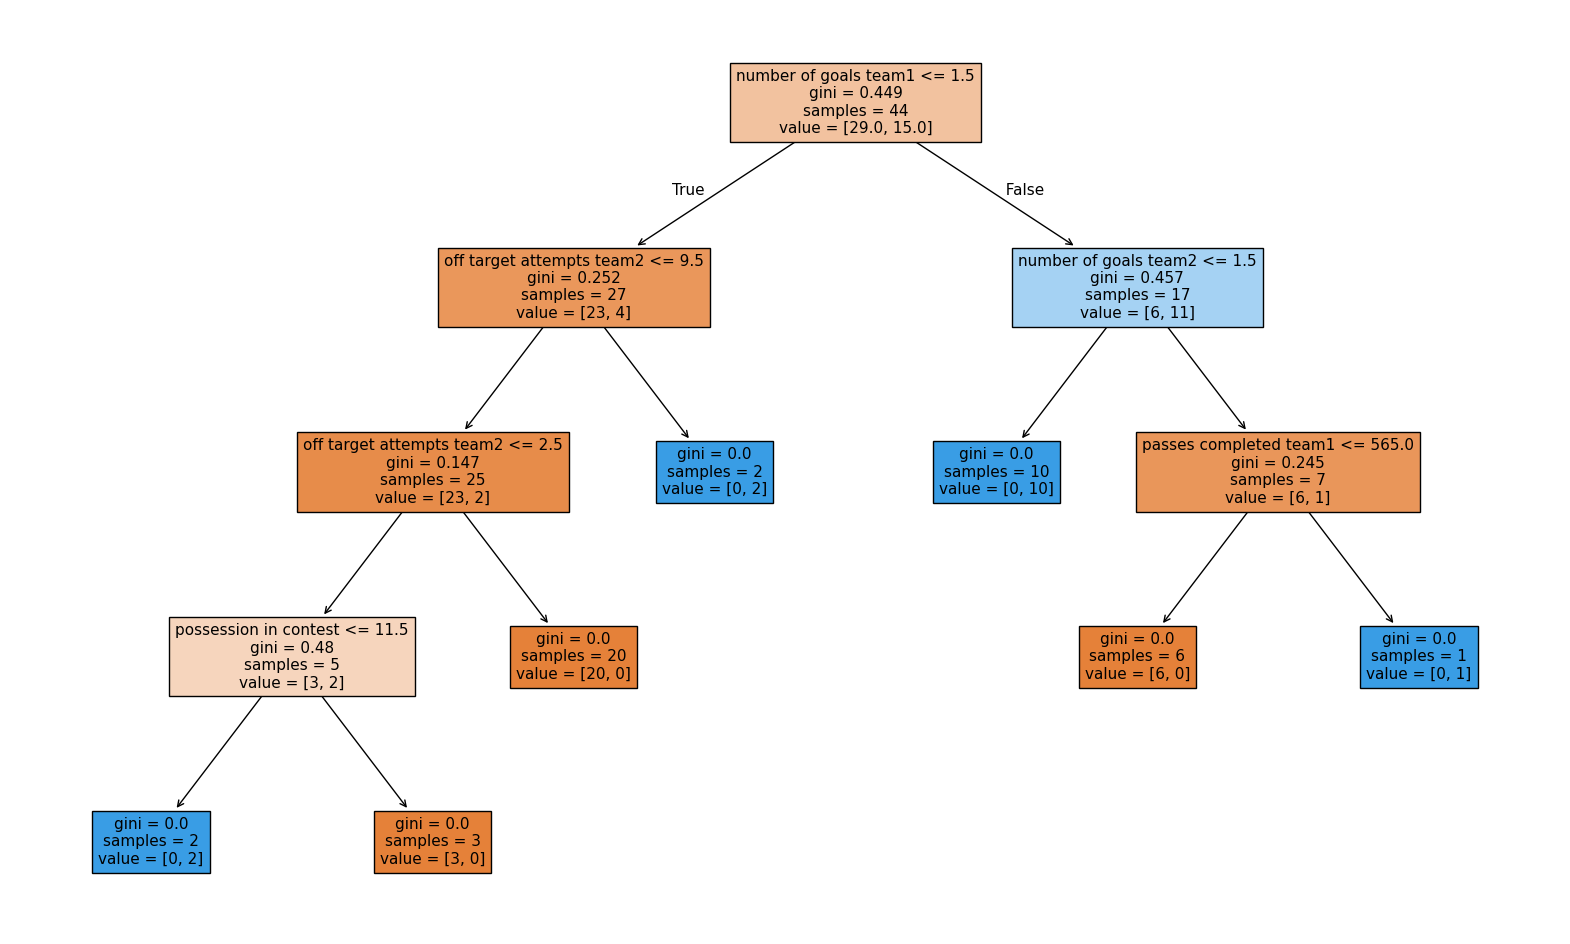

In [8]:
#  Decision Tree Visualization
from sklearn import tree

plt.figure(figsize=(20,12))
tree.plot_tree(clf, feature_names=X.columns, filled=True)
plt.show()


In [9]:
from sklearn.metrics import classification_report, confusion_matrix

print("\nTest Classification Report:\n", classification_report(y_test, pred_test))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, pred_test))

print("\nTrain Classification Report:\n", classification_report(y_train, pred_train))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, pred_train))


Test Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         6
           1       1.00      0.79      0.88        14

    accuracy                           0.85        20
   macro avg       0.83      0.89      0.84        20
weighted avg       0.90      0.85      0.86        20

Test Confusion Matrix:
 [[ 6  0]
 [ 3 11]]

Train Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        15

    accuracy                           1.00        44
   macro avg       1.00      1.00      1.00        44
weighted avg       1.00      1.00      1.00        44

Train Confusion Matrix:
 [[29  0]
 [ 0 15]]


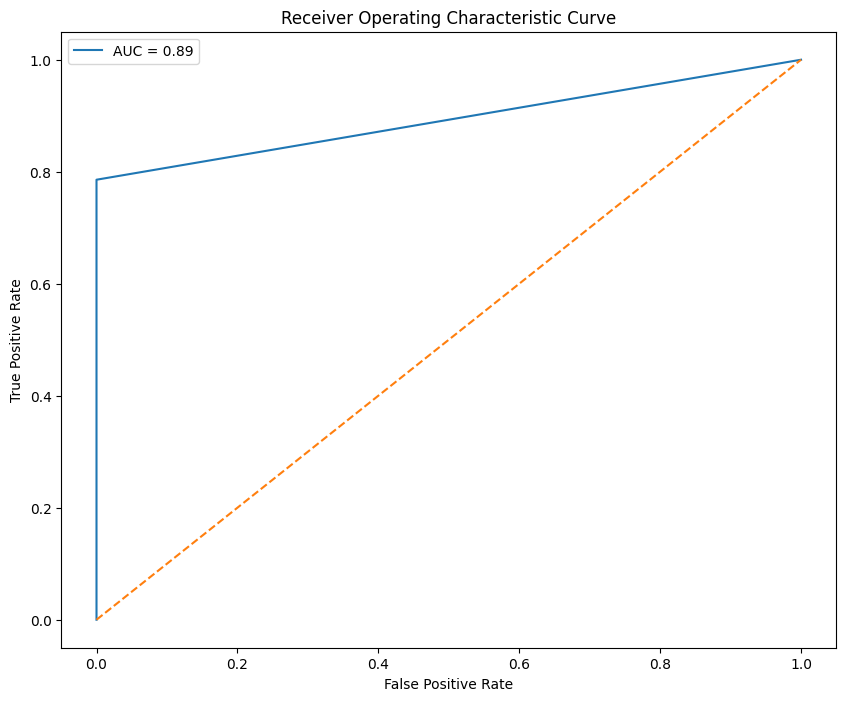

In [10]:
#Plot ROC Curve
from sklearn.metrics import roc_curve, auc

dt_probs = clf.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_probs)
auc_score_dt = auc(fpr_dt, tpr_dt)

def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(10,8))
    plt.plot(fpr, tpr, label='AUC = %0.2f' % auc_score_dt)
    plt.plot([0,1], [0,1], linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr_dt, tpr_dt)

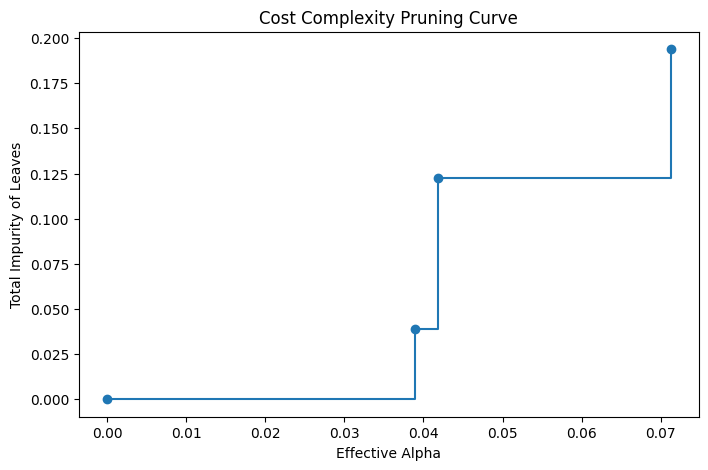

In [11]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
impurities = path.impurities

plt.figure(figsize=(8,5))
plt.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
plt.xlabel("Effective Alpha")
plt.ylabel("Total Impurity of Leaves")
plt.title("Cost Complexity Pruning Curve")
plt.show()